# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


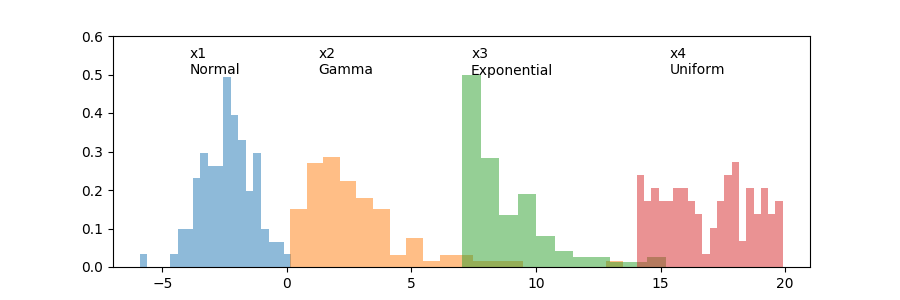

<IPython.core.display.Javascript object>


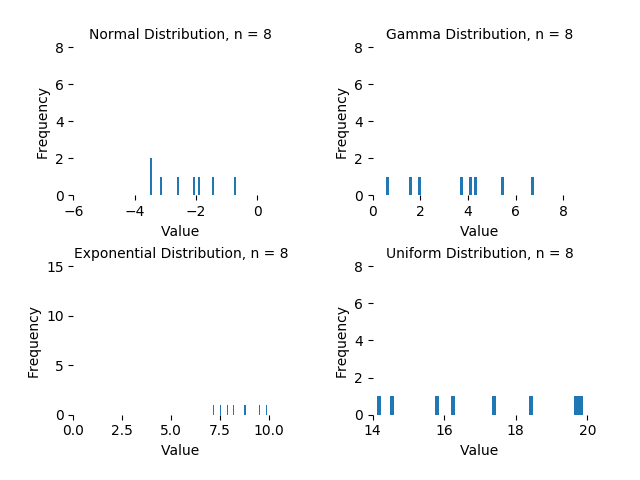

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 100)
x2 = np.random.gamma(2, 1.5, 100)
x3 = np.random.exponential(2, 100)+7
x4 = np.random.uniform(14,20, 100)

# plot the histograms

plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

#subplots

fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2)
#ax1.hist(x1, bins=50, alpha=0.5)
#ax2.hist(x2, bins=50, alpha=0.5)
#ax3.hist(x3, bins=50, alpha=0.5)
#ax4.hist(x4, bins=50, alpha=0.5)
#ax1.set_title('Normal distribution')
#ax2.set_title('Gamma distribution')
#ax3.set_title('Exponential distribution')
#ax4.set_title('Uniform distribution')
fig.tight_layout(pad=3.0)
for spine in ax1.spines.values():
    spine.set_visible(False)
for spine in ax2.spines.values():
    spine.set_visible(False)
for spine in ax3.spines.values():
    spine.set_visible(False)    
for spine in ax4.spines.values():
    spine.set_visible(False)    

n=100
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    ax1.cla()
    ax2.cla()
    ax3.cla()
    ax4.cla()
    ax1.hist(x1[:curr], bins=50)
    ax2.hist(x2[:curr], bins=50)
    ax3.hist(x3[:curr], bins=50)
    ax4.hist(x4[:curr], bins=50)
    ax1.axis([-6,1,0,8])
    ax2.axis([0,9,0,8])
    ax3.axis([0,11,0,15])
    ax4.axis([14,20,0,8])
    ax1.set_title('Normal Distribution, n = {}'.format(curr),fontsize=10)
    ax1.set_ylabel('Frequency')
    ax1.set_xlabel('Value')
    ax2.set_title('Gamma Distribution, n = {}'.format(curr),fontsize=10)
    ax2.set_ylabel('Frequency')
    ax2.set_xlabel('Value')
    ax3.set_title('Exponential Distribution, n = {}'.format(curr),fontsize=10)
    ax3.set_ylabel('Frequency')
    ax3.set_xlabel('Value')
    ax4.set_title('Uniform Distribution, n = {}'.format(curr),fontsize=10)
    ax4.set_ylabel('Frequency')
    ax4.set_xlabel('Value')
#    a.annotate(', [3,27])
    
animation.FuncAnimation(fig, update, interval=100,save_count=n)
#a.save('animation.mp4')